## Further collapse: from cloud to star

Molecular clouds are well-approximated as _isothermal_ because they radiate away energy efficiently as they collapse.

Stars are not!  They are _hydrostatic_ because their internal pressure balances gravity at their surfaces.

This lecture is based on [Krumholz](http://bender.astro.sunysb.edu/oab/star_formation_notes/sfnotes.pdf) ch 16-17.

It will cover:

* The Larson First Core
* Accretion Shocks
* Predicted thermal structure of cores


<img style="width:100%" src="https://s3.amazonaws.com/aasie/images/0004-637X/674/2/984/10_1086_524096_fg1_lr.gif">

[Aikawa+ 2008](https://ui.adsabs.harvard.edu/#abs/2008ApJ...674..984A/abstract)

Cloud: 

 * Isothermal, cooling rate exceeds (matches) heating rate: $\Lambda > \Gamma$
 * Free-fall collapse until the _equation of state_ changes (EOS = $P=\rho^\gamma$)

Larson's First Core

 * Adiabatic (radiation does not escape), hydrostatic, pressure-supported
 * Short-lived ($\lesssim10^4$ years)



Ends when compressive heating drives the core to ~1000-2000 K, when H$_2$ dissociates

H$_2$ dissociation is a 'heat sink': energy goes into changing the state from H$_2 \rightarrow$ H + H, like melting ice, so the EOS becomes isothermal again

Second collapse $\rightarrow$ Star

 * After the first core, there is free-fall collapse again
 * $\rho\sim10^{14}\mathrm{cm}^{-3} \rightarrow t_{ff} \sim \mathrm{years}$ 

## The protostar: A hydrostatic core

After the few short-lived collapse stages, there is a hydrostatic core.

It may be supported by gas pressure (adiabatically heated) or degeneracy pressure, depending on mass (lower mass are supported by degeneracy pressure)

## Accretion Shock

The core evolves slowly ("secularly"), but material still free-falls onto its surface: this produces an accretion shock with luminosity

\begin{equation} L_{acc} = \frac{G M_* \dot{M}}{R_*}\end{equation}

This is purely energy released from gravitational collapse

\begin{equation}\dot{M}\sim10^{-5}-10^{-6} \mathrm{M}_\odot \mathrm{yr}^{-1}\end{equation}

\begin{equation}R_* \sim 10 R_\odot\end{equation}

(it takes a while for a star to contract to the main-sequence size; we'll come back to that)

In [1]:
from astropy import constants, units as u

In [2]:
L_acc = constants.G * 1*u.M_sun / (10*u.R_sun) * 1e-5*u.M_sun/u.yr
L_acc.to(u.L_sun)

<Quantity 31.39927676 solLum>

## Accretion shock: speed

The accretion shock hits the stellar surface at approximately the free-fall speed:

\begin{equation} v_{ff} = \sqrt{\frac{2GM_*}{R_*}} \approx 200 \mathrm{~km~s}^{-1} \left(\frac{M}{M_\odot}\right)^{1/2} \left(\frac{R_*}{10 R_\odot}\right)^{-1/2} \end{equation}

<!--(200 km/s comes from Krumholz eqn 16.24; looks like a rounding error)-->

In [3]:
from astropy import constants, units as u
vff = np.sqrt(2*constants.G * u.M_sun / (10*u.R_sun)).to(u.km/u.s)
vff

<Quantity 195.32589059 km / s>

This produces a strong shock, with Mach number $\mathcal{M} = \frac{v_{ff}}{c_s} \sim 100$, which allows us to determine a post-shock temperature given an equation of state $\gamma$ and pre-shock temperature $T_1$:

\begin{eqnarray}
T_2 & = & \frac{2 \gamma (\gamma-1)}{(\gamma+1)^2} \mathcal{M}^2 T_1 \\
    & = & \frac{2 \gamma (\gamma-1)}{(\gamma+1)^2} \left(\frac{v_{shock}}{c_s}\right)^2 T_1 \\
    & = & \frac{2 \gamma (\gamma-1)}{(\gamma+1)^2} \frac{\mu m_H}{k_B} v_{shock}^2
\end{eqnarray}

This equation comes from the Rankine-Hugoniot Jump Conditions.  See Appendix F of Palla & Stahler.

For $v_{shock} = v_{ff} \approx 200 \mathrm{km~s}^{-1}$, $\gamma=5/3$ for a monatomic ideal gas, and $\mu=1.4$ for neutral hydrogen,

In [4]:
gamma = 5/3.
mu = 1.4
T2 = 2 * gamma * (gamma-1) / (gamma+1)**2 * mu * u.Da / constants.k_B * vff**2
T2.to(u.MK)

<Quantity 2.00753672 MK>

The gas is shock-heated to
\begin{equation}T_2 \approx 1.2\times10^6 M_{*,0} R_{*,1}^{-1} \mathrm{~K}\end{equation}
which is high enough to produce substantial UV and X-ray radiation.

As long as this radiation is limited to the soft-X-ray / UV range, the gas is extremely optically thick to it.

The radiation gets re-absorbed and re-emitted frequently, so it becomes a blackbody.

Mass and luminosity of an accreting protostar:

\begin{eqnarray}
L_{\rm acc} & = & 4\pi R_*^2 \sigma_{\rm SB} T_*^4 \\
T_* & = & 4300 \dot{M}_{*,-5}^{1/4} M_{*,0}^{1/4} R_{*,1}^{-3/4} \mbox{ K}
\end{eqnarray}

Despite the shock-heating, the immediate re-absorption & re-emission results in the protostar having surface temperature comparable to a main-sequence star, but larger and more luminous.

## Dust Destruction Front

Dust is a key component of all star formation since the first stars.

We can compute the equilibrium temperature of a dust grain as a function of its distance from an accreting star by equating its heating and cooling rates.

The heating rate $\Gamma$ of a dust grain with radius $a$ at distance $r$ from the star is

\begin{equation}\Gamma=\frac{L_{acc}}{4 \pi r^2} \pi a^2\end{equation}

Plug in our (proto)stellar accretion luminosity:

\begin{equation}\Gamma= \pi a^2 \sigma_{SB} T_*^4 \left(\frac{R_*}{r}\right)^2\end{equation}

The cooling rate $\Lambda$ is

\begin{equation}\Lambda = 4 \pi a^2 \sigma_{SB} T_D^4\end{equation}

Setting the heating and cooling rate equal gives

\begin{equation}\Lambda = \Gamma = 4 \pi a^2 \sigma_{SB} T_D^4 =  \pi a^2 \sigma_{SB} T_*^4 \left(\frac{R_*}{r}\right)^2\end{equation}

so
\begin{equation}T_d = \left(\frac{R_*}{2r}\right)^{1/2}T_*\end{equation}

Dust vaporizes (breaks apart into gas) at ~1000-1500 K.



There is a zone from the stellar surface out to some greater radius in which the gas is dust-free and neutral and therefore optically thin to optical/NIR radiation (i.e., radiation near the peak of a typical star's emission spectrum)

## The dust destruction radius

The point at which the equilibrium temperature is cool enough for dust to exist

\begin{equation}
r_d = \frac{R_*}{2} \left(\frac{T_*}{T_d}\right)^2 = 0.4 \,  T_{d,3}^{-2} \dot{M}_{*,-5}^{1/2} M_{*,0}^{1/2} R_{*,1}^{-1/2} \mbox{ AU},
\end{equation}
where $T_{d,3}=T_d/(1000\mbox{ K})$ is the dust destruction temperature in units of 1000 K, $\dot{M}_{*,-5} = \dot{M}/(10^{-5}\mbox{ M}_\odot\mbox{ yr}^{-1})$ is the accretion rate in $10^{-5}\mbox{M}_\odot\mbox{ yr}^{-1}$, $M_{*,0}=M_*/\mbox{M}_\odot$ is the stellar mass in $M_\odot$, and $R_{*,1} = R_*/(10\mbox{ R}_\odot)$ is the stellar radius in $10\mbox{ R}_\odot$.

Thus the dust-free region extends to $\sim 1$ AU around an accreting protostar.

# Observable Properties

Beyond the dust destruction radius, if we assume accretion is happening at some average rate at the free-fall speed, we have

\begin{equation}
\dot{M}_*  =  4\pi r_d^2 \rho v_{\rm ff} 
\end{equation}
<div class=fragment>
    which rearranges to
\begin{eqnarray}
\rho & = & \frac{\dot{M}_*}{\sqrt{8 \pi^2 G M_* r_d^3}} \\
& = & 4\times 10^{-13} \, \dot{M}_{*,-5}^{1/4} M_{*,0}^{-7/4} R_{*,1}^{3/4} T_{d,3}^3\mbox{ g cm}^{-3}\\
& \approx & 10^{11} \, \dot{M}_{*,-5}^{1/4} M_{*,0}^{-7/4} R_{*,1}^{3/4} T_{d,3}^3 \mbox{cm}^{-3} 
\end{eqnarray}
</div>

Following Wien's displacement law, using the temperature just inside the dust destruction front, the peak of the blackbody is 
\begin{equation}
\lambda \approx \frac{hc}{4k_BT} = 440 \, \dot{M}_{*,-5}^{-1/4} M_{*,0}^{-1/4} R_{*,1}^{3/4}\mbox{ nm},
\end{equation}
i.e., well into the visible (440 nm)

The dust opacity at optical wavelengths is $\kappa_{visible} \sim 8000 \mathrm{cm}^2 \mathrm{g}^{-1}$, so the mean-free-path is

\begin{equation}d \approx 1 / (\kappa_{visible} \rho) = 3\times10^8 \mathrm{cm}\end{equation}

That's tiny, $\sim R_\oplus$, so the light all gets absorbed and re-emitted in a small zone

In this situation, the starlight gets absorbed & re-emitted many times before it moves an appreciable distance, so it is treatable as a diffusion problem.

The diffusion problem is similar to that of a stellar interior.

We have the flux $F$
\begin{equation}F = -\frac{c}{3 \rho \kappa_R(T)} \nabla E\end{equation}
where $E$ is the radiation energy density and $\kappa_R(T)$ is the Rosseland mean opacity, which is the appropriate opacity average to use in the diffusion regime.

From [wikipedia](https://en.wikipedia.org/wiki/Opacity_(optics))

'''Planck opacity'''  uses the normalized Planck's law $ B_{\nu}(T)$, as the weighting function, and averages $\kappa_\nu$ directly:
$$\kappa_{Pl}={\int_0^\infty \kappa_\nu B_\nu(T) d\nu \over   \int_0^\infty B_\nu(T) d\nu }=\left( { \pi \over \sigma_{SB} T^4}\right) \int_0^\infty \kappa_\nu B_\nu(T) d\nu $$
where $\sigma_{SB}$ is the Stefan–Boltzmann constant.

'''Rosseland opacity''' uses a temperature derivative of Planck's law, $u(\nu, T)=\partial B_\nu(T)/\partial T$, as the weighting function, and averages $\kappa_\nu^{-1}$,
$$\frac{1}{\kappa} = \frac{\int_0^{\infty} \kappa_{\nu}^{-1} u(\nu, T) d\nu }{\int_0^{\infty} u(\nu,T) d\nu}$$

The photon mean free path is $\lambda_\nu = (\kappa_\nu \rho)^{-1}$. The Rosseland opacity is derived in the diffusion approximation to the radiative transport equation. It is valid whenever the radiation field is isotropic over distances comparable to or less than a radiation mean free path, such as in local thermal equilibrium. 

The radiation is in thermal equilibrium with the gas, so $E=a_R T^4$, where $a_R = 4 \sigma_{SB}/c$.

We can therefore equate the accretion luminosity to the diffusing flux:

\begin{equation}
L_{\rm acc} = 4 \pi r^2 F =-\frac{16\pi ca_R r^2}{3\rho\kappa_R} T^3 \frac{dT}{dr}
\end{equation}


Given a density structure $\rho(r)$ and a model for grain opacity $\kappa_{R}(T)$, we can calculate a temperature structure.

### Simple grain opacity model

Krumholz gives $\kappa_R(T) \propto T^{\alpha}$ with $\alpha=0.8$ when the temperature is in the few hundred K range, which is a decent approximation for more carefully tabulated opacities.

https://ui.adsabs.harvard.edu/abs/1994ApJ...421..615P/abstract

<img style='max-height:50%' src="graphics/RosselandMeanOpacity_Pollack1994.png">

If we assume both the temperature and density structures follow a power-law, $\rho\propto r^{-k_\rho}$ and $T\propto r^{-k_T}$, for constant $L(r)=L_{acc}$ (there is no energy loss in the diffusion regime)

\begin{equation}
L(r) = L_{\rm acc}=-\frac{16\pi ca_R r^2}{3\rho\kappa_R} T^3 \frac{dT}{dr}
\end{equation}
becomes, using $\kappa_R = T^\alpha = r^{-k_T \alpha}$,

\begin{equation}
L(r) = L_{\rm acc}=-\frac{16\pi c k_Ta_R r^2}{3r^{-k_\rho} r^{-k_T \alpha}} r^{-3 k_T} r^{-1-k_T}
\end{equation}


\begin{equation}L_{\rm acc}=-\frac{16\pi c k_Ta_R}{3} r^{2 -3 k_T - 1 - k_T + k_\rho + k_T \alpha}\end{equation}

\begin{equation}L_{\rm acc}=-\frac{16\pi c k_Ta_R}{3} r^{1 + (\alpha-4) k_T + k_\rho}\end{equation}

\begin{equation}L_{\rm acc}=-\frac{16\pi c k_Ta_R}{3} r^{1 + (\alpha-4) k_T + k_\rho}\end{equation}

If we solve for an equilibrium state, in which $L_{acc}=$ constant, this implies $1+(\alpha-4) k_T +k_\rho=0$ or
\begin{equation}k_T = \frac{1+k_\rho}{4-\alpha}\end{equation}

We derived earlier that $\rho \propto r^{3/2}$, or $k_\rho = 3/2$, for a free-falling envelope, which yields $k_T \approx 0.8$.

## Expected temperatures

In our fiducial example, where the temperature
is 1000 K at 0.4 AU, we would expect the temperature to drop to
300 K at around 2 AU, to 100 K at around 8 AU, and back to the background temperature of 10 K at around 150 AU.

In the outer part of the envelope the falloff in temperature can be either steeper or shallower depending on how the density falls off – sharper density falloffs (larger kρ) lead to sharper temperature falls (larger kT) as well.

More sophisticated modeling is needed to account for varying optical depth with wavelength.

Stars have sharp density drops at their photosphere, so the star reaches a low optical depth at about the same location independent of wavelength.

Protostellar cores have gradual density decrease with radius, so long-wavelength radiation escapes, while short-wavelength radiation is reprocessed locally.

## Practical example: the total SED of multi-temperature structures

The examples below aren't really right because they ignore optical depth of concentric shells.

In [5]:
# https://github.com/keflavich/dust_emissivity
from dust_emissivity import dust, blackbody

In [6]:
%matplotlib inline
import pylab as pl
pl.style.use('dark_background')
pl.rcParams['figure.dpi'] = 150
pl.rcParams['figure.figsize'] = (7,5)
pl.rcParams['font.size'] = 14
from astropy.visualization import quantity_support

If the whole system were optically thin, we could just add up the blackbodies:

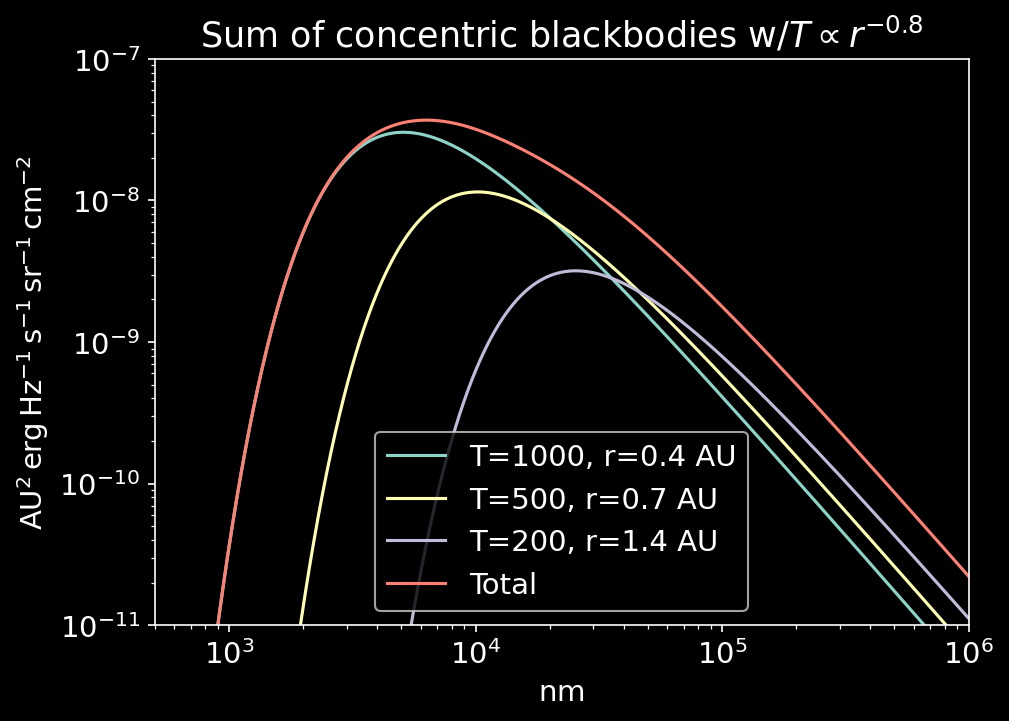

In [7]:
lam = np.logspace(2.5, 6, int(1e5))*u.nm
r_1000 = 0.4*u.au
r_500 = r_1000 * (500/1000)**-0.8
r_200 = r_1000 * (200/1000)**-0.8
bb1000 = (blackbody.blackbody(lam.to(u.GHz, u.spectral()), temperature=1000*u.K) * r_1000**2)
bb500 = blackbody.blackbody(lam.to(u.GHz, u.spectral()), temperature=500*u.K) * r_500**2
bb200 = blackbody.blackbody(lam.to(u.GHz, u.spectral()), temperature=200*u.K) * r_200**2
bb_sum = bb1000+bb500+bb200

pl.figure(figsize=(7,5))
with quantity_support():
    pl.loglog(lam, bb1000, label=f'T=1000, r={r_1000:0.1f}')
    pl.loglog(lam, bb500, label=f'T=500, r={r_500:0.1f}')
    pl.loglog(lam, bb200, label=f'T=200, r={r_200:0.1f}')
    pl.loglog(lam, bb_sum, label='Total')
    pl.legend(loc='best')
pl.ylim(1e-11, 1e-7)
pl.xlim(5e2, 1e6)
_=pl.title("Sum of concentric blackbodies w/$T\\propto r^{-0.8}$")

You can see that these still have a long-wavelength slope approaching $F\propto\lambda^{-2}$:

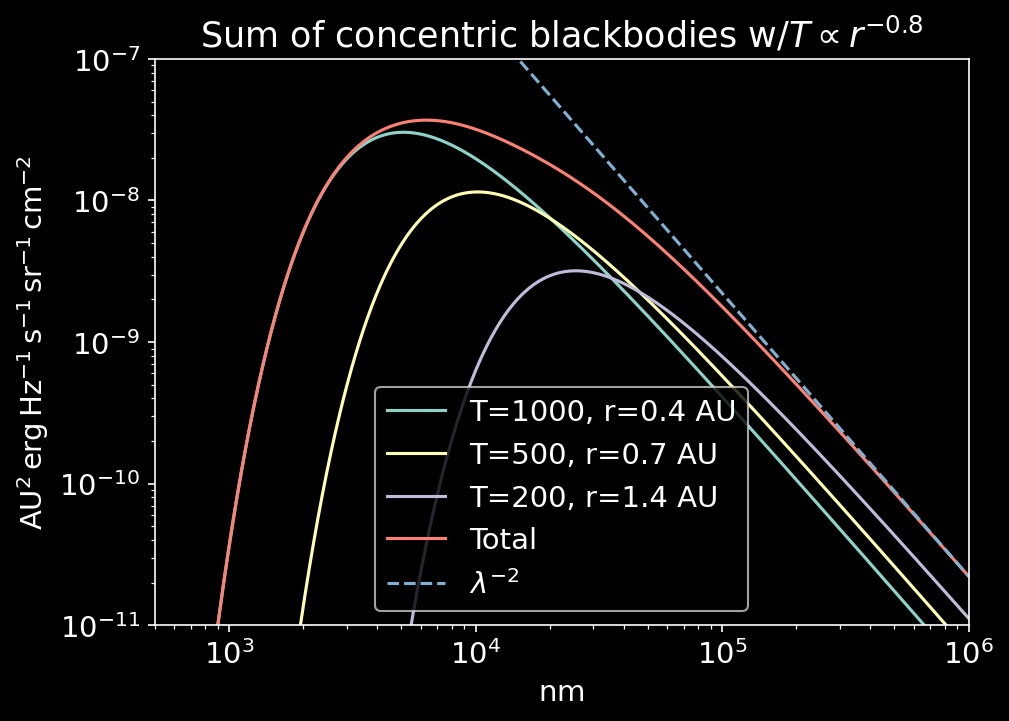

In [8]:
lam = np.logspace(2.5, 6, int(1e5))*u.nm
r_1000 = 0.4*u.au
r_500 = r_1000 * (500/1000)**-0.8
r_200 = r_1000 * (200/1000)**-0.8
bb1000 = (blackbody.blackbody(lam.to(u.GHz, u.spectral()), temperature=1000*u.K) * r_1000**2)
bb500 = blackbody.blackbody(lam.to(u.GHz, u.spectral()), temperature=500*u.K) * r_500**2
bb200 = blackbody.blackbody(lam.to(u.GHz, u.spectral()), temperature=200*u.K) * r_200**2
bb_sum = bb1000+bb500+bb200

pl.figure(figsize=(7,5))
with quantity_support():
    pl.loglog(lam, bb1000, label=f'T=1000, r={r_1000:0.1f}')
    pl.loglog(lam, bb500, label=f'T=500, r={r_500:0.1f}')
    pl.loglog(lam, bb200, label=f'T=200, r={r_200:0.1f}')
    pl.loglog(lam, bb_sum, label='Total')
    pl.loglog(lam, bb_sum[-1]*(lam/lam[-1])**-2, label='$\lambda^{-2}$', linestyle='--')
    pl.legend(loc='best')    
pl.ylim(1e-11, 1e-7)
pl.xlim(5e2, 1e6)
_=pl.title("Sum of concentric blackbodies w/$T\\propto r^{-0.8}$")

Since they're not optically thin, we can make some hokey assumptions about the wavelength at which they become optically thin and just replace the fluxes beyond the blackbody peak with the fluxes from a cooler external layer.

This isn't physical, but is somewhat illustrative of the process

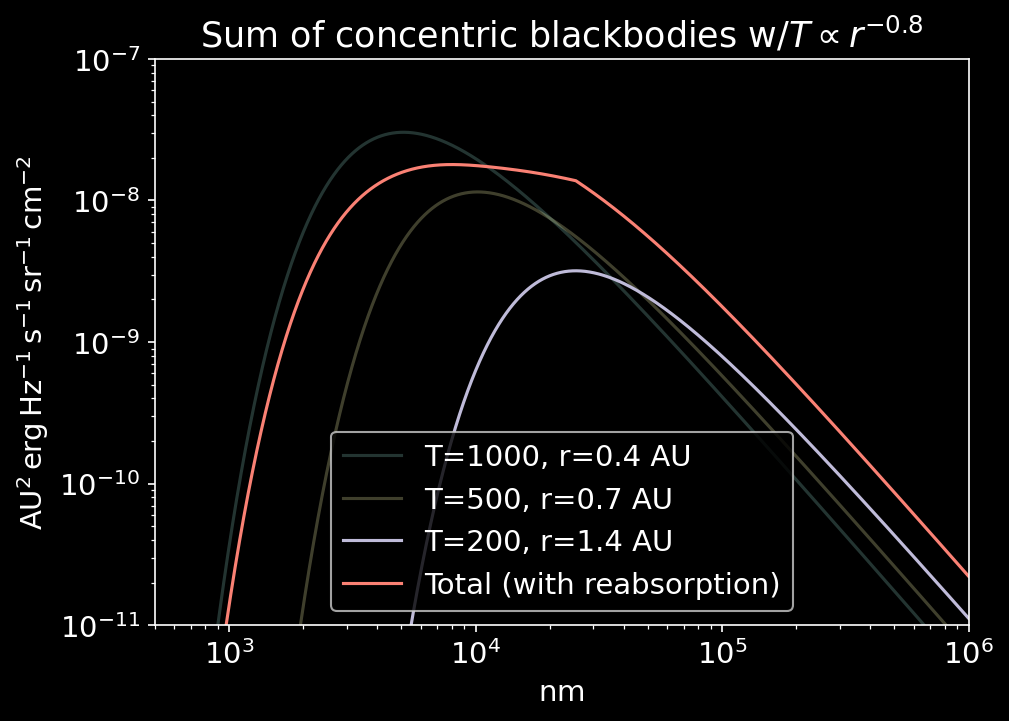

In [9]:
peak_200 =lam[np.argmax(bb200)]
bb_thick200sum = bb200 + np.where(lam > peak_200, bb500+bb1000,
                                  np.exp((lam-peak_200)/peak_200)*(bb500+bb1000))

pl.figure(figsize=(7,5))
with quantity_support():
    pl.loglog(lam, bb1000, label=f'T=1000, r={r_1000:0.1f}', alpha=0.25)
    pl.loglog(lam, bb500, label=f'T=500, r={r_500:0.1f}', alpha=0.25)
    pl.loglog(lam, bb200, label=f'T=200, r={r_200:0.1f}')
    pl.loglog(lam, bb_thick200sum, label='Total (with reabsorption)')
    pl.legend(loc='best')    
pl.ylim(1e-11, 1e-7)
pl.xlim(5e2, 1e6)
_=pl.title("Sum of concentric blackbodies w/$T\\propto r^{-0.8}$")

The reality is that the dust opacity matters.  If we use modified blackbodies, the long-wavelength slope gets steeper:

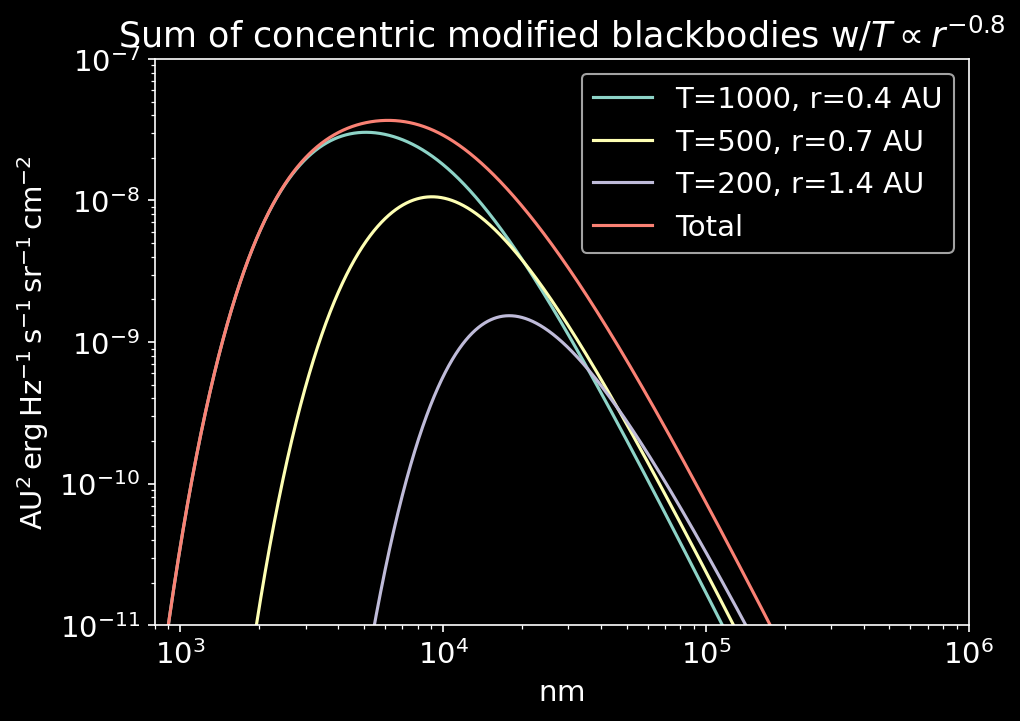

In [10]:
lam = np.logspace(2.5, 6, int(1e5))*u.nm
r_1000 = 0.4*u.au
r_500 = r_1000 * (500/1000)**-0.8
r_200 = r_1000 * (200/1000)**-0.8
bb1000 = blackbody.modified_blackbody(lam.to(u.GHz, u.spectral()), temperature=1000*u.K) * r_1000**2
bb500 = blackbody.modified_blackbody(lam.to(u.GHz, u.spectral()), temperature=500*u.K) * r_500**2
bb200 = blackbody.modified_blackbody(lam.to(u.GHz, u.spectral()), temperature=200*u.K) * r_200**2
modbb_sum = bb1000+bb500+bb200

pl.figure(figsize=(7,5))
with quantity_support():
    pl.loglog(lam, bb1000, label=f'T=1000, r={r_1000:0.1f}')
    pl.loglog(lam, bb500, label=f'T=500, r={r_500:0.1f}')
    pl.loglog(lam, bb200, label=f'T=200, r={r_200:0.1f}')
    pl.loglog(lam, modbb_sum, label='Total')
    pl.legend(loc='best')
    
pl.ylim(1e-11, 1e-7)
pl.xlim(8e2, 1e6)
_=pl.title("Sum of concentric modified blackbodies w/$T\\propto r^{-0.8}$")

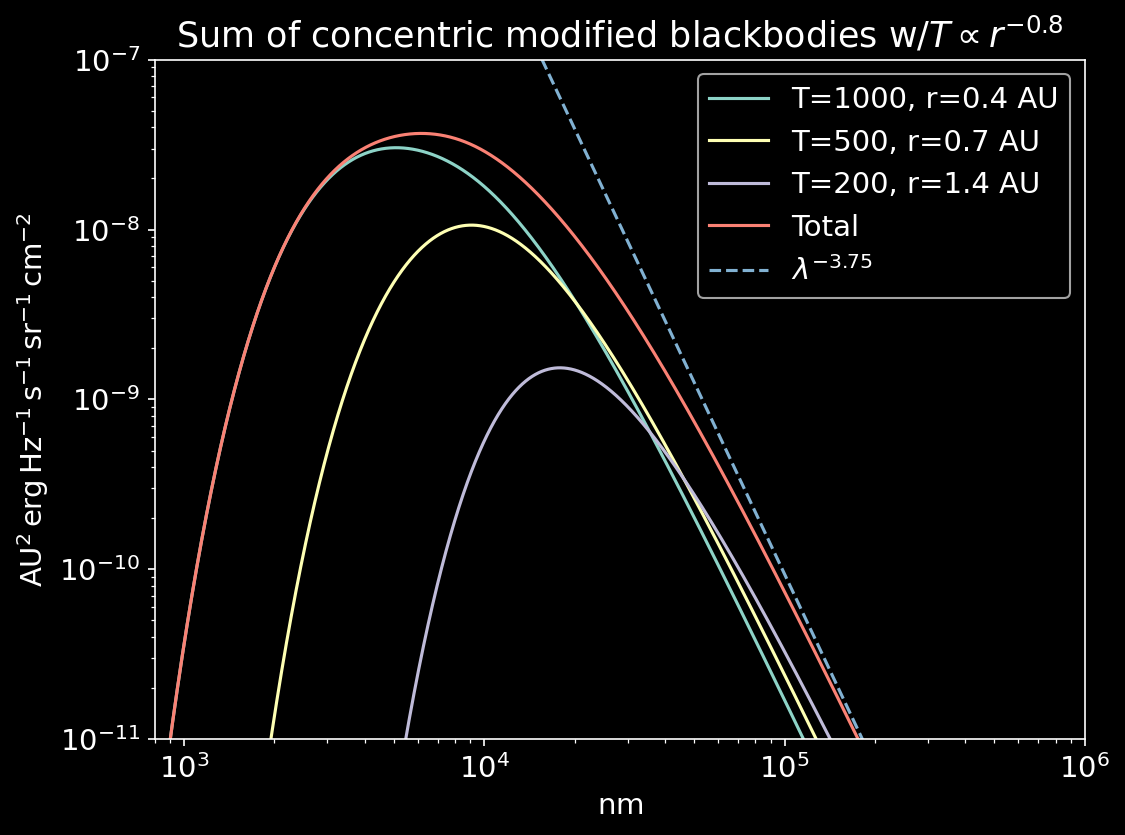

In [11]:
lam = np.logspace(2.5, 6, int(1e5))*u.nm
r_1000 = 0.4*u.au
r_500 = r_1000 * (500/1000)**-0.8
r_200 = r_1000 * (200/1000)**-0.8
bb1000 = blackbody.modified_blackbody(lam.to(u.GHz, u.spectral()), temperature=1000*u.K) * r_1000**2
bb500 = blackbody.modified_blackbody(lam.to(u.GHz, u.spectral()), temperature=500*u.K) * r_500**2
bb200 = blackbody.modified_blackbody(lam.to(u.GHz, u.spectral()), temperature=200*u.K) * r_200**2
modbb_sum = bb1000+bb500+bb200

pl.figure(figsize=(8,6), dpi=150)
with quantity_support():
    pl.loglog(lam, bb1000, label=f'T=1000, r={r_1000:0.1f}')
    pl.loglog(lam, bb500, label=f'T=500, r={r_500:0.1f}')
    pl.loglog(lam, bb200, label=f'T=200, r={r_200:0.1f}')
    pl.loglog(lam, modbb_sum, label='Total')
    pl.loglog(lam, modbb_sum[-1]*(lam/lam[-1])**-3.75, label='$\lambda^{-3.75}$', linestyle='--')    
    pl.legend(loc='best')
    
pl.ylim(1e-11, 1e-7)
pl.xlim(8e2, 1e6)
_=pl.title("Sum of concentric modified blackbodies w/$T\\propto r^{-0.8}$")

So in the (wrong) approximation that every layer is optically thin, our sum-of-different-temperatures model is a slightly broadened blackbody or modified blackbody:

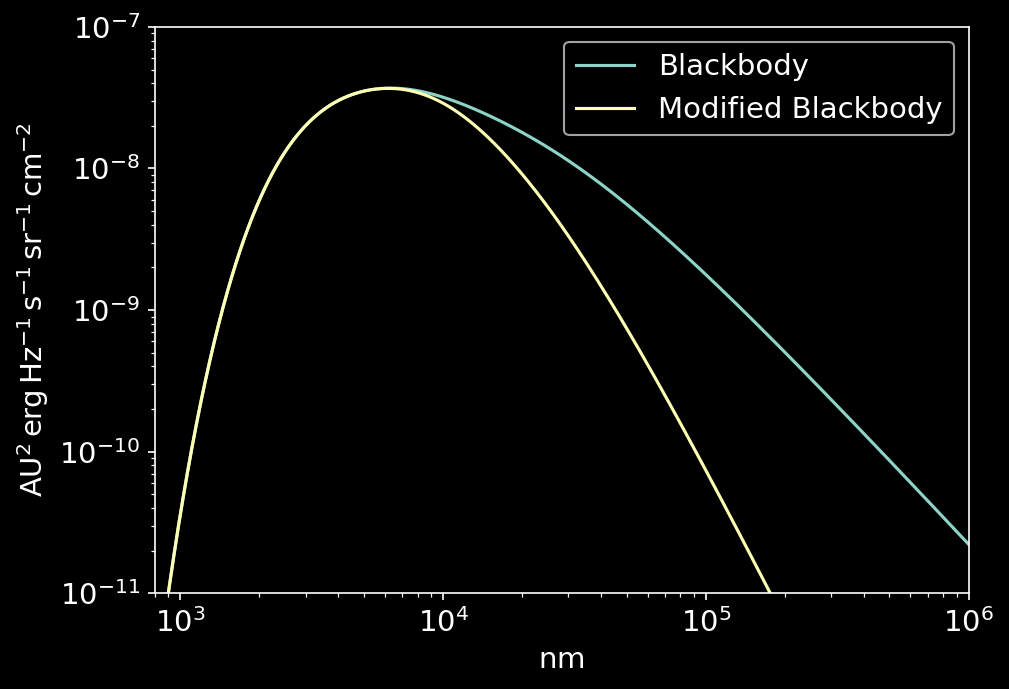

In [12]:
pl.figure(figsize=(7,5))
with quantity_support():
    pl.loglog(lam, bb_sum, label='Blackbody')
    pl.loglog(lam, modbb_sum, label='Modified Blackbody')
    pl.legend(loc='best')
    
pl.ylim(1e-11, 1e-7)
_=pl.xlim(8e2, 1e6)

We can do better than the above examples.

We can determine the optical depth as a function of wavelength and radius.

From Hartmann via Tom Megeath's lectures:
$$\tau_{\lambda} = \frac{\kappa_\lambda \dot{M}}{2\pi \sqrt{2 G M}} r^{-1/2}$$

$\kappa_\lambda$ is the opacity per unit mass of the infalling gas.

To get the effective photospheric size, we integrate to $\tau_\lambda=2/3$, giving:
    $$r_\lambda = \frac{9 \kappa_\lambda^2 \dot{M}^2}{32 \pi^2 GM}$$

The shape of $\kappa_\lambda$ here is critical.  We use Karl Gordon's `dust_extinction` package to get a "realistic" Milky-Way-like extinction curve, and we use an opacity-per-unit-mass reference point based on the Ossenkopf & Henning 1994 models.

(the `dust_extinction` and dust emission packages need to be integrated)

In [13]:
import dust_extinction
from dust_extinction.grain_models import WD01

In [14]:
dustmodel = WD01("MWRV55")

In [15]:
lam = np.logspace(2.5, 6, int(1e5))*u.nm
mdot = 1e-6*u.Msun/u.yr
mstar = 1*u.M_sun
kappa = dust.kappa(1*u.mm) / dustmodel(1*u.mm) * dustmodel(lam)
kappa[lam<10*u.um] /= 10
r_lam = (9 * kappa**2 * mdot**2 / (32 * np.pi**2 * constants.G * mstar)).to(u.au)
tem = 1000 * (r_lam/(0.4*u.au))**-0.8 * u.K

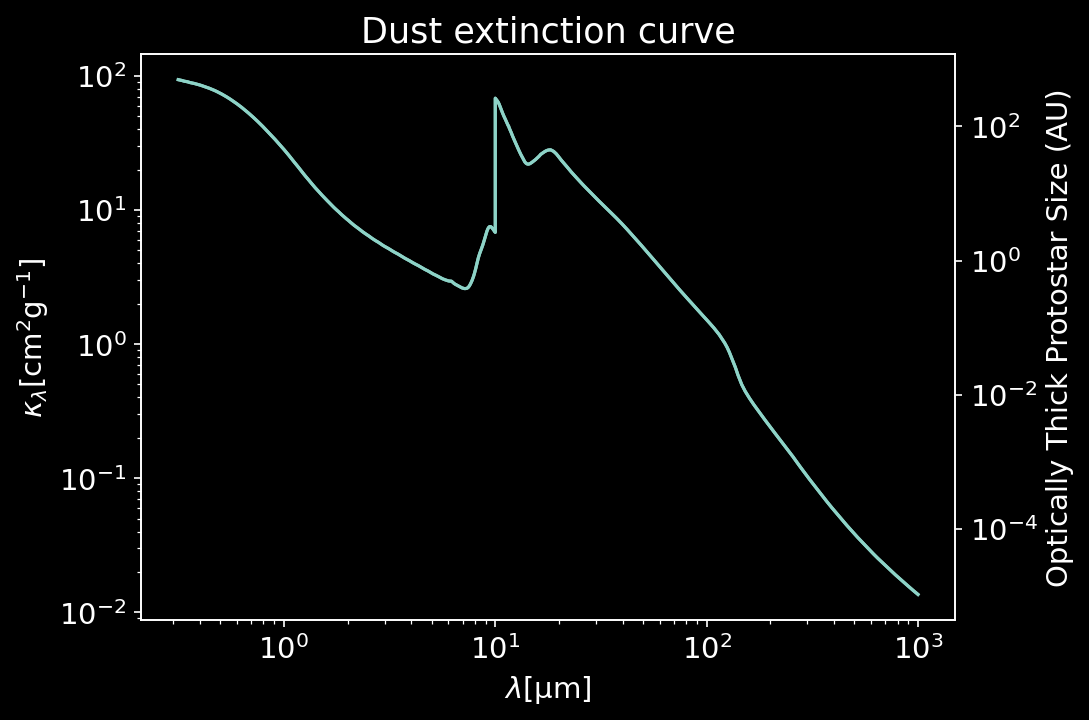

In [33]:
with quantity_support():
    ax1 = pl.gca()
    ax1.loglog(lam.to(u.um), kappa)
    ax1.set_title("Dust extinction curve")
    ax1.set_ylabel("$\kappa_\lambda [\mathrm{cm}^2 \mathrm{g}^{-1}]$")
    ax1.set_xlabel(r"$\lambda [\mathrm{\mu m}]$")
    ax2 = ax1.twinx()
    ax2.loglog(lam.to(u.um), r_lam.to(u.au),  label='$\\lambda(r)$')#, color='r', linestyle='--')
    #ax2.set_xlabel("Wavelength (nm)")
    ax2.set_ylabel("Optically Thick Protostar Size (AU)")

This diagnostic plot shows, as a function of radius, the wavelength that is optically thick and the temperature.

The inversion of the size-wavelength curve means the model still won't be simple.

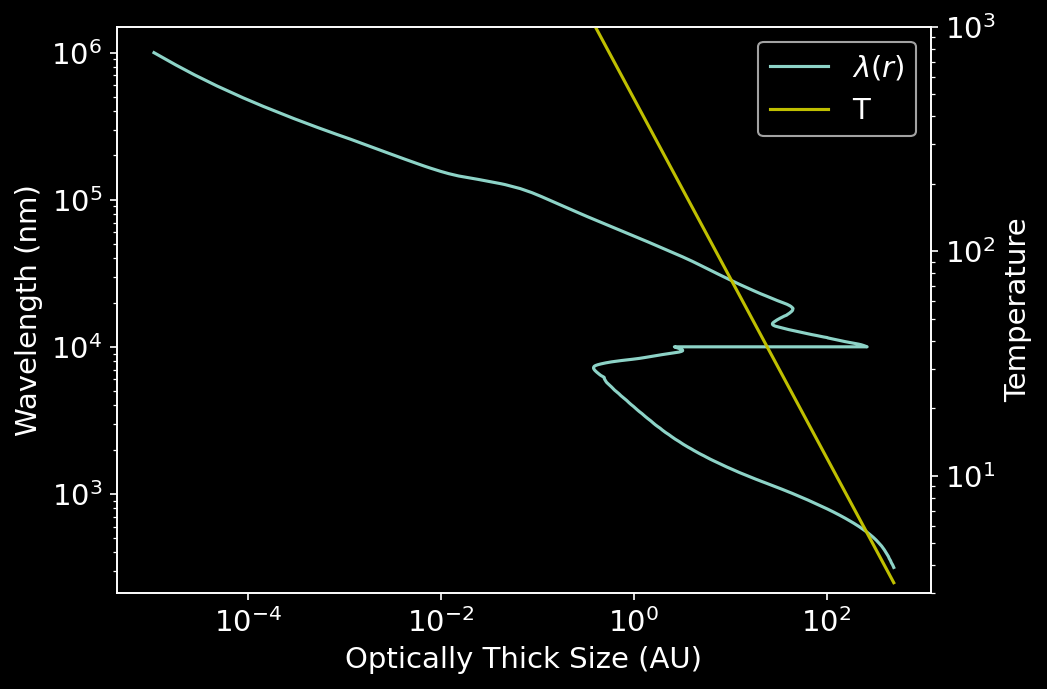

In [20]:
ax = pl.gca()
ax.loglog(r_lam.to(u.au), lam, label='$\\lambda(r)$')
ax.set_ylabel("Wavelength (nm)")
ax.set_xlabel("Optically Thick Size (AU)")
ax2 = ax.twinx()
ax2.loglog(r_lam, tem, color='y', label='T')
ax2.set_ylabel("Temperature")
ax2.set_ylim(3, 1000)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best');

Text(0, 0.5, 'Optically Thick Size (AU)')

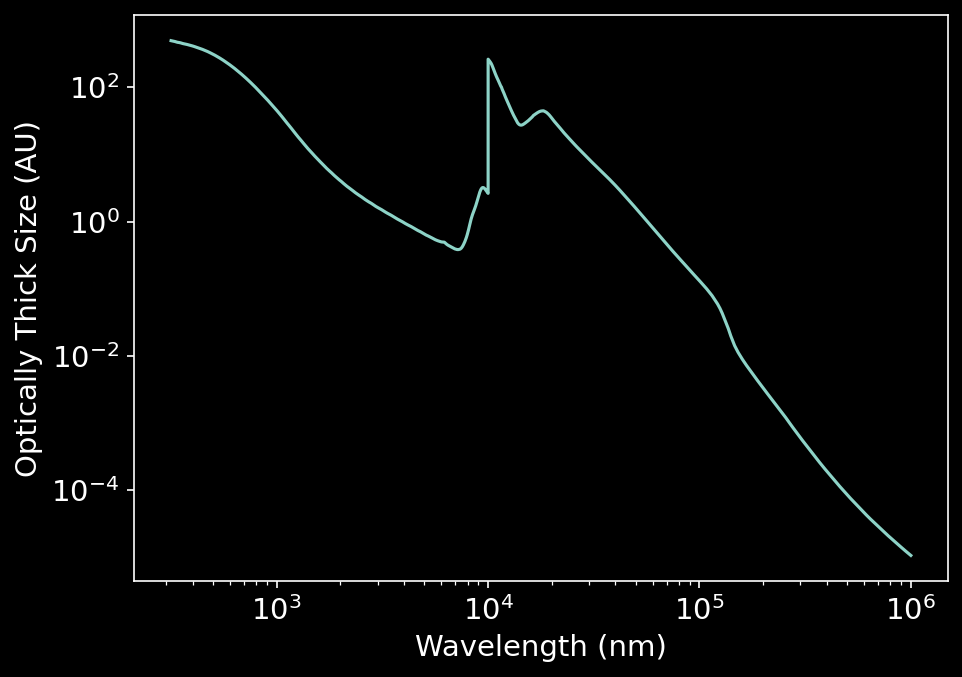

In [22]:
ax = pl.gca()
ax.loglog(lam, r_lam.to(u.au),  label='$\\lambda(r)$')
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Optically Thick Size (AU)")

The purple curve below shows a somewhat flat SED in which both the hot inner envelope and the cool outer envelope are detectable.

/Users/adam/repos/dust_emissivity/dust_emissivity/blackbody.py:31: RuntimeWarning: overflow encountered in exp
  I = (2*_h*nu**3 / _c**2 * (exp(_h*nu/(_k_B*temperature)) - 1)**-1)


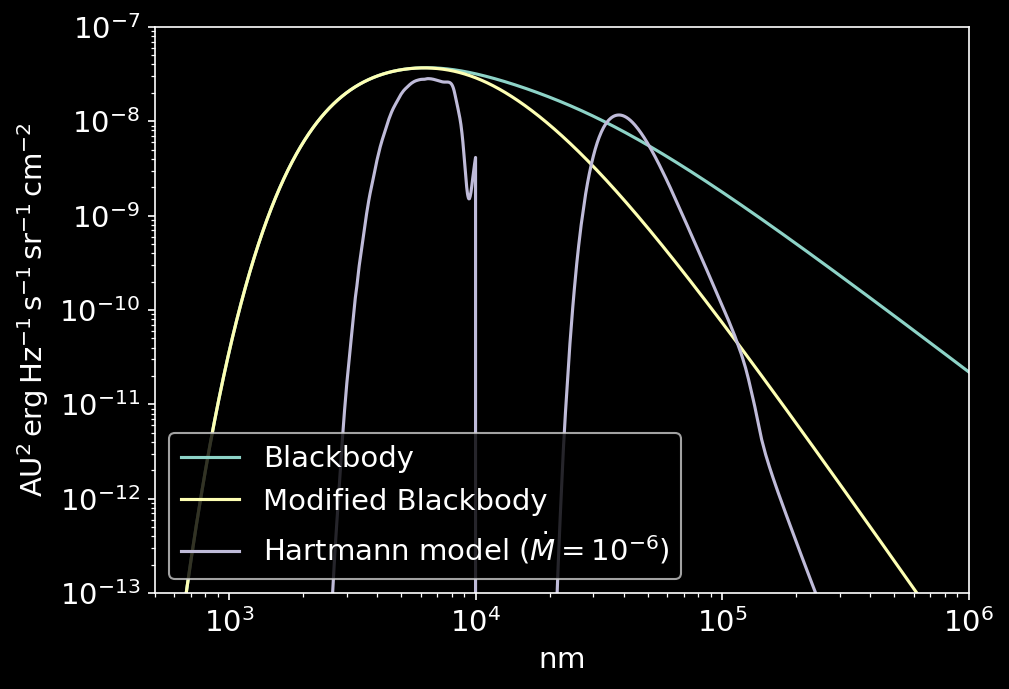

In [18]:
hbb = blackbody.blackbody(lam.to(u.GHz, u.spectral()), temperature=tem) * r_lam**2

pl.figure(figsize=(7,5))
with quantity_support():
    pl.loglog(lam, bb_sum, label='Blackbody')
    pl.loglog(lam, modbb_sum, label='Modified Blackbody')
    pl.loglog(lam, hbb, label='Hartmann model ($\dot{M}=10^{-6}$)')
    pl.legend(loc='best')
pl.ylim(1e-13, 1e-7)
_=pl.xlim(5e2, 1e6)

## Summary:

 * Cores (may or may not) exist
 * Cores collapse
 * They stop for a minute as Larson First cores
 * They collapse further
 * Then they stop and form a protostar
 * Accretion onto the now-hydrostatic core makes a shock
 * Protostars heat up their surroundings

<img src="https://keflavich.github.io/talks/colloquium_assets/Purcell_Cartoon_LowMass.svg">